# FetchMaker
We’ve just started working at the hottest new tech startup, FetchMaker. FetchMaker’s mission is to match up prospective dog owners with their perfect pet. FetchMaker has been collecting data on their adoptable dogs, and it’s our job to analyze some of that data.

In [37]:
import pandas as pd
from scipy.stats import binom_test,f_oneway,chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('dog_data.csv')
df.head()

,is_rescue,weight,tail_length,age,color,likes_children,is_hypoallergenic,name,breed
0,0,6,2.25,2,black,1,0,Huey,chihuahua
1,0,4,5.36,4,black,0,0,Cherish,chihuahua
2,0,7,3.63,3,black,0,1,Becka,chihuahua
3,0,5,0.19,2,black,0,0,Addie,chihuahua
4,0,5,0.37,1,black,1,1,Beverlee,chihuahua



FetchMaker estimates (based on historical data for all dogs) that 8% of dogs in their system are rescues.

They would like to know if whippets are significantly more or less likely than other dogs to be a rescue.

In [31]:
print(df.breed.unique())
print(len(df))
print(df.color.unique())

['chihuahua' 'greyhound' 'pitbull' 'poodle' 'rottweiler' 'shihtzu'
 'terrier' 'whippet']
800
['black' 'brown' 'gold' 'grey' 'white']


In [8]:
whippets = df[df.breed == 'whippet']
print(len(whippets))
num_whippets_rescue = whippets.is_rescue.sum()
print(num_whippets_rescue)

100
6


# Hypothesis 1

Null: 8% of whippets are rescues

Alternative: more or less than 8% of whippets are rescues

In [11]:
pval = binom_test(6,100,0.08)
print('Binom Test',pval)

Binom Test 0.5811780106238098


Using a significance threshold of 0.05, the proportion of whippets who are rescues significantly not different from 8%. Therefore our null Hypothesis is correct.

# Mid-Sized Dog Weights

Three of FetchMaker’s most popular mid-sized dog breeds are 'whippet's, 'terrier's, and 'pitbull's. Is there a significant difference in the average weights of these three dog breeds?

In [27]:
terrier = df[df.breed == 'terrier']
pitbull = df[df.breed == 'pitbull']
wt_whippets = whippets.weight
wt_terrier = terrier.weight
wt_pitpull = pitbull.weight
dogs_wtp = df[df.breed.isin(['whippet', 'terrier', 'pitbull'])]


# Hypothesis 2

Null: whippets, terriers, and pitbulls all weigh the same amount on average

Alternative: whippets, terriers, and pitbulls do not all weigh the same amount on average (at least one pair of breeds has differing average weights)

3.276415588274815e-17


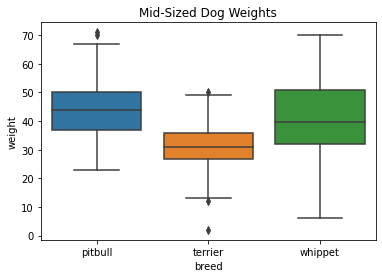

In [40]:
sns.boxplot(x= dogs_wtp.breed,y=dogs_wtp.weight)
plt.title('Mid-Sized Dog Weights')
fstat,pval = f_oneway(wt_whippets,wt_terrier,wt_pitpull)
print(pval)

Using a significance threshold of 0.05, whippets, terriers, and pitbulls do not all weigh the same amount on average (at least one pair of breeds has differing average weights)

In [29]:
output = pairwise_tukeyhsd(dogs_wtp.weight, dogs_wtp.breed)
print(output)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
pitbull terrier   -13.24  0.001 -16.728 -9.752   True
pitbull whippet    -3.34 0.0639  -6.828  0.148  False
terrier whippet      9.9  0.001   6.412 13.388   True
-----------------------------------------------------


For any pair where “Reject” is “True”, we conclude that those two breeds weigh significantly different amounts.

# Poodle and Shihtzu Colors

FetchMaker wants to know if 'poodle's and 'shihtzu's come in different colors.

In [32]:
dogs_ps = df[df.breed.isin(['poodle','shihtzu'])]
crosstab = pd.crosstab(dogs_ps.breed,dogs_ps.color)
print(crosstab)

color    black  brown  gold  grey  white
breed                                   
poodle      17     13     8    52     10
shihtzu     10     36     6    41      7


# Hypothesis 3

Null: There is an association between breed (poodle vs. shihtzu) and color.

Alternative: There is not an association between breed (poodle vs. shihtzu) and color.

In [36]:
chi2,pval,dof,exxpected = chi2_contingency(crosstab)
print(pval)

0.005302408293244597


Using a significance threshold of 0.05,There is not an association between breed (poodle vs. shihtzu) and color.